In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional


print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


In [2]:
df_init = pd.read_csv('../csv/S1_Rural.csv', sep=';')
print(df_init.head())
print(list(df_init.columns))

   time  10_validity  10_timeliness  10_recall  10_quantity  10_precision  \
0   500            1              1        1.0     1.000000      1.000000   
1  1000            1              1        1.0     1.000000      1.000000   
2  1500            1              1        1.0     0.910526      0.981154   
3  2000            1              1        1.0     0.894737      1.000000   
4  2500            1              1        1.0     0.936842      1.000000   

   10_detail  10_accuracy    10_QoI  10_ThBps  ...  19_ThBps    19_PDR  \
0          1            1  1.000000  1.000000  ...  1.000000  0.919182   
1          1            1  1.000000  1.000000  ...  1.000000  0.927673   
2          1            1  0.893366  0.861374  ...  1.000000  0.967745   
3          1            1  0.894737  0.832127  ...  0.979285  0.971698   
4          1            1  0.936842  0.896804  ...  0.916342  0.955660   

   19_Jitter  19_GWAv  19_Delay    19_QoE    19_QoD  19_thruthfullness  \
0   1.000000      

In [3]:
cols_GWAv = pd.DataFrame()
cols_Jitter = pd.DataFrame()
cols_Delay = pd.DataFrame()
cols_ThBps = pd.DataFrame()
cols_quantity = pd.DataFrame()
cols_PDR = pd.DataFrame()
cols_recall = pd.DataFrame()
cols_QoE = pd.DataFrame()


cols_GWAv = df_init[['10_GWAv','11_GWAv','12_GWAv','13_GWAv','14_GWAv','15_GWAv','16_GWAv','17_GWAv','18_GWAv','19_GWAv']]
cols_Jitter = df_init[['10_Jitter','11_Jitter','12_Jitter','13_Jitter','14_Jitter','15_Jitter','16_Jitter','17_Jitter','18_Jitter','19_Jitter']]
cols_Delay = df_init[['10_Delay','11_Delay','12_Delay','13_Delay','14_Delay','15_Delay','16_Delay','17_Delay','18_Delay','19_Delay']]
cols_ThBps = df_init[['10_ThBps','11_ThBps','12_ThBps','13_ThBps','14_ThBps','15_ThBps','16_ThBps','17_ThBps','18_ThBps','19_ThBps']]
cols_quantity = df_init[['10_quantity','11_quantity','12_quantity','13_quantity','14_quantity','15_quantity','16_quantity','17_quantity','18_quantity','19_quantity']]
cols_PDR = df_init[['10_PDR','11_PDR','12_PDR','13_PDR','14_PDR','15_PDR','16_PDR','17_PDR','18_PDR','19_PDR']]
cols_recall = df_init[['10_recall','11_recall','12_recall','13_recall','14_recall','15_recall','16_recall','17_recall','18_recall','19_recall']]
cols_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]

cols2 = ['GWAv', 'Jitter', 'Delay','ThBps','quantity','PDR','recall','Decision']

df2 = pd.DataFrame(columns=cols2)


In [4]:
aux0 = pd.Series(cols_GWAv['10_GWAv'])
aux1 = pd.Series(cols_GWAv['11_GWAv'])
aux2 = pd.Series(cols_GWAv['12_GWAv'])
aux3 = pd.Series(cols_GWAv['13_GWAv'])
aux4 = pd.Series(cols_GWAv['14_GWAv'])
aux5 = pd.Series(cols_GWAv['15_GWAv'])
aux6 = pd.Series(cols_GWAv['16_GWAv'])
aux7 = pd.Series(cols_GWAv['17_GWAv'])
aux8 = pd.Series(cols_GWAv['18_GWAv'])
aux9 = pd.Series(cols_GWAv['19_GWAv'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['GWAv'] = pd.Series(aux)

[0.99999999 0.99999999 1.         ... 1.         1.         1.        ]


In [5]:
aux0 = pd.Series(cols_Jitter['10_Jitter'])
aux1 = pd.Series(cols_Jitter['11_Jitter'])
aux2 = pd.Series(cols_Jitter['12_Jitter'])
aux3 = pd.Series(cols_Jitter['13_Jitter'])
aux4 = pd.Series(cols_Jitter['14_Jitter'])
aux5 = pd.Series(cols_Jitter['15_Jitter'])
aux6 = pd.Series(cols_Jitter['16_Jitter'])
aux7 = pd.Series(cols_Jitter['17_Jitter'])
aux8 = pd.Series(cols_Jitter['18_Jitter'])
aux9 = pd.Series(cols_Jitter['19_Jitter'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Jitter'] = pd.Series(aux)

[1.         1.         0.95780123 ... 0.93198443 0.86233521 0.91114961]


In [6]:
aux0 = pd.Series(cols_Delay['10_Delay'])
aux1 = pd.Series(cols_Delay['11_Delay'])
aux2 = pd.Series(cols_Delay['12_Delay'])
aux3 = pd.Series(cols_Delay['13_Delay'])
aux4 = pd.Series(cols_Delay['14_Delay'])
aux5 = pd.Series(cols_Delay['15_Delay'])
aux6 = pd.Series(cols_Delay['16_Delay'])
aux7 = pd.Series(cols_Delay['17_Delay'])
aux8 = pd.Series(cols_Delay['18_Delay'])
aux9 = pd.Series(cols_Delay['19_Delay'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Delay'] = pd.Series(aux)

[1.         1.         0.87829235 ... 0.88051457 0.79051404 0.8863648 ]


In [7]:
aux0 = pd.Series(cols_ThBps['10_ThBps'])
aux1 = pd.Series(cols_ThBps['11_ThBps'])
aux2 = pd.Series(cols_ThBps['12_ThBps'])
aux3 = pd.Series(cols_ThBps['13_ThBps'])
aux4 = pd.Series(cols_ThBps['14_ThBps'])
aux5 = pd.Series(cols_ThBps['15_ThBps'])
aux6 = pd.Series(cols_ThBps['16_ThBps'])
aux7 = pd.Series(cols_ThBps['17_ThBps'])
aux8 = pd.Series(cols_ThBps['18_ThBps'])
aux9 = pd.Series(cols_ThBps['19_ThBps'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['ThBps'] = pd.Series(aux)

[1.         1.         0.86137437 ... 0.76550176 0.73728916 0.76289285]


In [8]:
aux0 = pd.Series(cols_quantity['10_quantity'])
aux1 = pd.Series(cols_quantity['11_quantity'])
aux2 = pd.Series(cols_quantity['12_quantity'])
aux3 = pd.Series(cols_quantity['13_quantity'])
aux4 = pd.Series(cols_quantity['14_quantity'])
aux5 = pd.Series(cols_quantity['15_quantity'])
aux6 = pd.Series(cols_quantity['16_quantity'])
aux7 = pd.Series(cols_quantity['17_quantity'])
aux8 = pd.Series(cols_quantity['18_quantity'])
aux9 = pd.Series(cols_quantity['19_quantity'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['quantity'] = pd.Series(aux)

[1.         1.         0.91052632 ... 0.81516588 0.8056872  0.79620853]


In [9]:
aux0 = pd.Series(cols_PDR['10_PDR'])
aux1 = pd.Series(cols_PDR['11_PDR'])
aux2 = pd.Series(cols_PDR['12_PDR'])
aux3 = pd.Series(cols_PDR['13_PDR'])
aux4 = pd.Series(cols_PDR['14_PDR'])
aux5 = pd.Series(cols_PDR['15_PDR'])
aux6 = pd.Series(cols_PDR['16_PDR'])
aux7 = pd.Series(cols_PDR['17_PDR'])
aux8 = pd.Series(cols_PDR['18_PDR'])
aux9 = pd.Series(cols_PDR['19_PDR'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['PDR'] = pd.Series(aux)

[0.96226415 0.96100629 0.94779874 ... 0.93553459 0.92001183 0.99056604]


In [10]:
aux0 = pd.Series(cols_recall['10_recall'])
aux1 = pd.Series(cols_recall['11_recall'])
aux2 = pd.Series(cols_recall['12_recall'])
aux3 = pd.Series(cols_recall['13_recall'])
aux4 = pd.Series(cols_recall['14_recall'])
aux5 = pd.Series(cols_recall['15_recall'])
aux6 = pd.Series(cols_recall['16_recall'])
aux7 = pd.Series(cols_recall['17_recall'])
aux8 = pd.Series(cols_recall['18_recall'])
aux9 = pd.Series(cols_recall['19_recall'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['recall'] = pd.Series(aux)

[1. 1. 1. ... 1. 1. 1.]


In [11]:
aux0 = pd.Series(cols_QoE['10_QoE'])
aux1 = pd.Series(cols_QoE['11_QoE'])
aux2 = pd.Series(cols_QoE['12_QoE'])
aux3 = pd.Series(cols_QoE['13_QoE'])
aux4 = pd.Series(cols_QoE['14_QoE'])
aux5 = pd.Series(cols_QoE['15_QoE'])
aux6 = pd.Series(cols_QoE['16_QoE'])
aux7 = pd.Series(cols_QoE['17_QoE'])
aux8 = pd.Series(cols_QoE['18_QoE'])
aux9 = pd.Series(cols_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Decision'] = pd.Series(aux)

[0.96226415 0.96100628 0.68678778 ... 0.58769399 0.46239909 0.61030815]


In [12]:
print(df2)

       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall  \
0       1.0  1.000000  1.000000  1.000000  1.000000  0.962264     1.0   
1       1.0  1.000000  1.000000  1.000000  1.000000  0.961006     1.0   
2       1.0  0.957801  0.878292  0.861374  0.910526  0.947799     1.0   
3       1.0  0.954141  0.874021  0.832127  0.894737  0.953716     1.0   
4       1.0  1.000000  0.954291  0.896804  0.936842  0.950629     1.0   
...     ...       ...       ...       ...       ...       ...     ...   
14395   1.0  0.808682  0.778512  0.752852  0.786730  0.901973     1.0   
14396   1.0  0.895011  0.893121  0.958470  0.962085  0.916724     1.0   
14397   1.0  0.931984  0.880515  0.765502  0.815166  0.935535     1.0   
14398   1.0  0.862335  0.790514  0.737289  0.805687  0.920012     1.0   
14399   1.0  0.911150  0.886365  0.762893  0.796209  0.990566     1.0   

       Decision  
0      0.962264  
1      0.961006  
2      0.686788  
3      0.661826  
4      0.813559  
...         ...

[6912, 520, 488, 1535, 3582, 3811, 8279, 9863, 434, 9195]
[2, 1, 5, 4, 4, 3, 2, 9, 2, 10]
-----------------------------
[11438, 6924, 5574, 4552, 2547, 3527, 12509, 5514, 1674, 1519]
[13, 20, 18, 16, 13, 17, 19, 14, 10, 12]
-----------------------------
[13223, 711, 11955, 7527, 8785]
[394, 249, 383, 376, 335]
-----------------------------


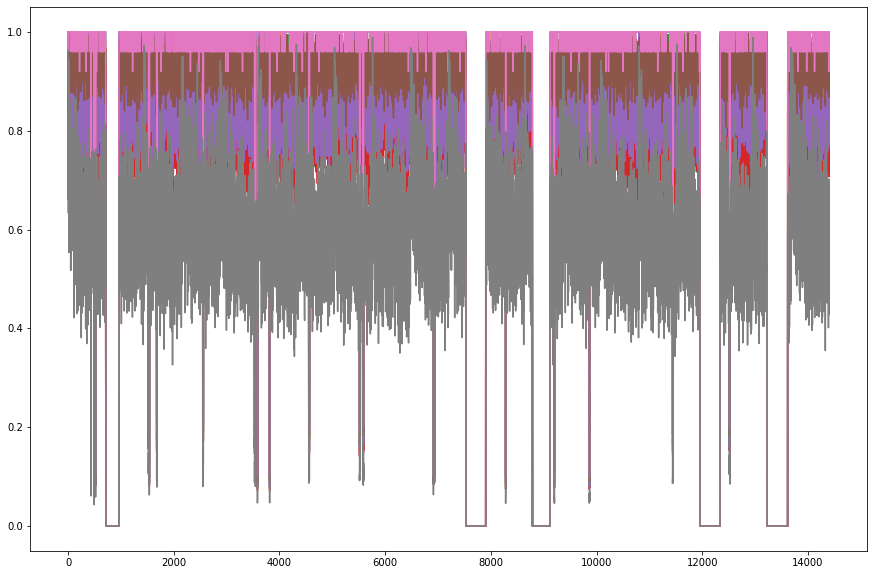

In [13]:
random.seed(42)

lent = df2['GWAv'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df2[init1[i]:init1[i]+leng1[i]] = df2[init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df2[init2[i]:init2[i]+leng2[i]] = df2[init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df2[init3[i]:init3[i]+leng3[i]] = df2[init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(df2)
plt.show()

In [14]:
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [15]:
y_testt = df2['Decision']
for i in range(0,df2.shape[0]):
    if(df2['Decision'][i] >=0.8 and df2['Decision'][i] <=1):
        df2['Decision'][i] = 5
    if(df2['Decision'][i] <0.8 and df2['Decision'][i]>=0.6):
        df2['Decision'][i] = 4   
    if(df2['Decision'][i] <0.6 and df2['Decision'][i]>=0.4):
        df2['Decision'][i] = 3
    if(df2['Decision'][i] <0.4 and df2['Decision'][i]>=0.2):
        df2['Decision'][i] = 2
    if(df2['Decision'][i] <0.2 and df2['Decision'][i]>=0):
        df2['Decision'][i] = 1  
        

In [16]:
print(df2.columns)
df_decision = df2['Decision']
df2 = df2.drop(['Decision'],axis=1)
print(df2)




Index(['GWAv', 'Jitter', 'Delay', 'ThBps', 'quantity', 'PDR', 'recall',
       'Decision'],
      dtype='object')
       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall
0       1.0  1.000000  1.000000  1.000000  1.000000  0.962264     1.0
1       1.0  1.000000  1.000000  1.000000  1.000000  0.961006     1.0
2       1.0  0.957801  0.878292  0.861374  0.910526  0.947799     1.0
3       1.0  0.954141  0.874021  0.832127  0.894737  0.953716     1.0
4       1.0  1.000000  0.954291  0.896804  0.936842  0.950629     1.0
...     ...       ...       ...       ...       ...       ...     ...
14395   1.0  0.808682  0.778512  0.752852  0.786730  0.901973     1.0
14396   1.0  0.895011  0.893121  0.958470  0.962085  0.916724     1.0
14397   1.0  0.931984  0.880515  0.765502  0.815166  0.935535     1.0
14398   1.0  0.862335  0.790514  0.737289  0.805687  0.920012     1.0
14399   1.0  0.911150  0.886365  0.762893  0.796209  0.990566     1.0

[14400 rows x 7 columns]


In [17]:
df2_train, df2_test, dec_train, dec_test = train_test_split(df2, y_testt, test_size=0.25, shuffle=False, random_state=42)


In [18]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf_train = clf.fit(df2_train, dec_train)
dec_test = dec_test.to_numpy();
yhat = clf_train.predict(df2_test)
print(yhat)


[5. 5. 5. ... 3. 3. 4.]


In [19]:
print(len(yhat))
print(len(dec_test))

yhat2 = yhat/max(yhat)
print(yhat2)

comp = {'yhat': yhat, 'y_test': dec_test}
df_comp = pd.DataFrame(data=comp)
print(df_comp)


3600
3600
[1.  1.  1.  ... 0.6 0.6 0.8]
      yhat  y_test
0      5.0     5.0
1      5.0     5.0
2      5.0     5.0
3      5.0     5.0
4      5.0     5.0
...    ...     ...
3595   3.0     3.0
3596   4.0     4.0
3597   3.0     3.0
3598   3.0     3.0
3599   4.0     4.0

[3600 rows x 2 columns]


In [20]:
min = 0
count = 0;
notif_paper = []
notif2_paper = []

th = 0.5


for i in range(0,len(yhat)):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif_paper.append(0)
        notif2_paper.append(0)
    else:
        if(yhat[i] < dec_train[i-1]*th):
            notif_paper.append(1)
        else:
            notif_paper.append(0)
        
        if(dec_train[i] < dec_train[i-1]*th or dec_train[i] <=2):
            notif2_paper.append(1)
        else:
            notif2_paper.append(0)    



In [21]:
df_QoI = pd.DataFrame()
df_QoE = pd.DataFrame()
df_QoD = pd.DataFrame()
cols = ['QoE', 'QoI', 'QoD']
df = pd.DataFrame(columns=cols)
print(df)

Empty DataFrame
Columns: [QoE, QoI, QoD]
Index: []


In [22]:
df_QoI = df_init[['10_QoI','11_QoI','12_QoI','13_QoI','14_QoI','15_QoI','16_QoI','17_QoI','18_QoI','19_QoI']]
df_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]
df_QoD = df_init[['10_QoD','11_QoD','12_QoD','13_QoD','14_QoD','15_QoD','16_QoD','17_QoD','18_QoD','19_QoD']]

In [23]:
print(df_QoE)

       10_QoE    11_QoE    12_QoE    13_QoE    14_QoE    15_QoE    16_QoE  \
0    0.962264  0.943396  0.952830  0.949057  0.911164  0.949686  0.974843   
1    0.961006  0.908658  0.972642  0.704546  0.942070  0.971698  0.803126   
2    0.686788  0.713431  0.785633  0.695824  0.813522  0.815140  0.724651   
3    0.661826  0.787669  0.945133  0.623236  0.711854  0.812028  0.910953   
4    0.813559  0.763845  0.903901  0.837161  0.836591  0.880008  0.731545   
..        ...       ...       ...       ...       ...       ...       ...   
715  0.608716  0.678773  0.649191  0.576194  0.626808  0.587250  0.453862   
716  0.590713  0.525581  0.551406  0.530513  0.673053  0.595718  0.534033   
717  0.488328  0.665288  0.562033  0.621315  0.575911  0.432179  0.639831   
718  0.576729  0.576619  0.511456  0.584800  0.483473  0.571591  0.646187   
719  0.529852  0.572828  0.494125  0.630425  0.438912  0.503606  0.550808   

       17_QoE    18_QoE    19_QoE  
0    0.958491  0.988994  0.919182  
1  

In [24]:
aux0 = pd.Series(df_QoE['10_QoE'])
aux1 = pd.Series(df_QoE['11_QoE'])
aux2 = pd.Series(df_QoE['12_QoE'])
aux3 = pd.Series(df_QoE['13_QoE'])
aux4 = pd.Series(df_QoE['14_QoE'])
aux5 = pd.Series(df_QoE['15_QoE'])
aux6 = pd.Series(df_QoE['16_QoE'])
aux7 = pd.Series(df_QoE['17_QoE'])
aux8 = pd.Series(df_QoE['18_QoE'])
aux9 = pd.Series(df_QoE['19_QoE'])
aux10 = pd.Series(df_QoE['10_QoE'])
aux11 = pd.Series(df_QoE['11_QoE'])
aux12 = pd.Series(df_QoE['12_QoE'])
aux13 = pd.Series(df_QoE['13_QoE'])
aux14 = pd.Series(df_QoE['14_QoE'])
aux15 = pd.Series(df_QoE['15_QoE'])
aux16 = pd.Series(df_QoE['16_QoE'])
aux17 = pd.Series(df_QoE['17_QoE'])
aux18 = pd.Series(df_QoE['18_QoE'])
aux19 = pd.Series(df_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoE'] = pd.Series(aux)




[0.96226415 0.96100628 0.68678778 ... 0.58769399 0.46239909 0.61030815]


In [25]:
print(df)

            QoE  QoI  QoD
0      0.962264  NaN  NaN
1      0.961006  NaN  NaN
2      0.686788  NaN  NaN
3      0.661826  NaN  NaN
4      0.813559  NaN  NaN
...         ...  ...  ...
14395  0.427510  NaN  NaN
14396  0.702353  NaN  NaN
14397  0.587694  NaN  NaN
14398  0.462399  NaN  NaN
14399  0.610308  NaN  NaN

[14400 rows x 3 columns]


In [26]:
aux0 = pd.Series(df_QoI['10_QoI'])
aux1 = pd.Series(df_QoI['11_QoI'])
aux2 = pd.Series(df_QoI['12_QoI'])
aux3 = pd.Series(df_QoI['13_QoI'])
aux4 = pd.Series(df_QoI['14_QoI'])
aux5 = pd.Series(df_QoI['15_QoI'])
aux6 = pd.Series(df_QoI['16_QoI'])
aux7 = pd.Series(df_QoI['17_QoI'])
aux8 = pd.Series(df_QoI['18_QoI'])
aux9 = pd.Series(df_QoI['19_QoI'])
aux10 = pd.Series(df_QoI['10_QoI'])
aux11 = pd.Series(df_QoI['11_QoI'])
aux12 = pd.Series(df_QoI['12_QoI'])
aux13 = pd.Series(df_QoI['13_QoI'])
aux14 = pd.Series(df_QoI['14_QoI'])
aux15 = pd.Series(df_QoI['15_QoI'])
aux16 = pd.Series(df_QoI['16_QoI'])
aux17 = pd.Series(df_QoI['17_QoI'])
aux18 = pd.Series(df_QoI['18_QoI'])
aux19 = pd.Series(df_QoI['19_QoI'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoI'] = pd.Series(aux)


[1.         1.         0.8933664  ... 0.79980314 0.8056872  0.79620853]


In [27]:
print(df)

            QoE       QoI  QoD
0      0.962264  1.000000  NaN
1      0.961006  1.000000  NaN
2      0.686788  0.893366  NaN
3      0.661826  0.894737  NaN
4      0.813559  0.936842  NaN
...         ...       ...  ...
14395  0.427510  0.771903  NaN
14396  0.702353  0.962085  NaN
14397  0.587694  0.799803  NaN
14398  0.462399  0.805687  NaN
14399  0.610308  0.796209  NaN

[14400 rows x 3 columns]


In [28]:
aux0 = pd.Series(df_QoD['10_QoD'])
aux1 = pd.Series(df_QoD['11_QoD'])
aux2 = pd.Series(df_QoD['12_QoD'])
aux3 = pd.Series(df_QoD['13_QoD'])
aux4 = pd.Series(df_QoD['14_QoD'])
aux5 = pd.Series(df_QoD['15_QoD'])
aux6 = pd.Series(df_QoD['16_QoD'])
aux7 = pd.Series(df_QoD['17_QoD'])
aux8 = pd.Series(df_QoD['18_QoD'])
aux9 = pd.Series(df_QoD['19_QoD'])
aux10 = pd.Series(df_QoD['10_QoD'])
aux11 = pd.Series(df_QoD['11_QoD'])
aux12 = pd.Series(df_QoD['12_QoD'])
aux13 = pd.Series(df_QoD['13_QoD'])
aux14 = pd.Series(df_QoD['14_QoD'])
aux15 = pd.Series(df_QoD['15_QoD'])
aux16 = pd.Series(df_QoD['16_QoD'])
aux17 = pd.Series(df_QoD['17_QoD'])
aux18 = pd.Series(df_QoD['18_QoD'])
aux19 = pd.Series(df_QoD['19_QoD'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoD'] = pd.Series(aux)


[0.05513706 0.40839831 0.50770713 ... 0.55237941 0.52961147 0.55300191]


In [29]:
print(df)
df_bup = df

            QoE       QoI       QoD
0      0.962264  1.000000  0.055137
1      0.961006  1.000000  0.408398
2      0.686788  0.893366  0.507707
3      0.661826  0.894737  0.524546
4      0.813559  0.936842  0.539673
...         ...       ...       ...
14395  0.427510  0.771903  0.546984
14396  0.702353  0.962085  0.540139
14397  0.587694  0.799803  0.552379
14398  0.462399  0.805687  0.529611
14399  0.610308  0.796209  0.553002

[14400 rows x 3 columns]


In [30]:
var_x = np.linspace(0.0, df.shape[0]-1, num=df.shape[0])
print(var_x)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.4397e+04 1.4398e+04 1.4399e+04]


In [31]:
print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


[6912, 520, 488, 1535, 3582, 3811, 8279, 9863, 434, 9195]
[2, 1, 5, 4, 4, 3, 2, 9, 2, 10]
-----------------------------
[11438, 6924, 5574, 4552, 2547, 3527, 12509, 5514, 1674, 1519]
[13, 20, 18, 16, 13, 17, 19, 14, 10, 12]
-----------------------------
[13223, 711, 11955, 7527, 8785]
[394, 249, 383, 376, 335]
-----------------------------


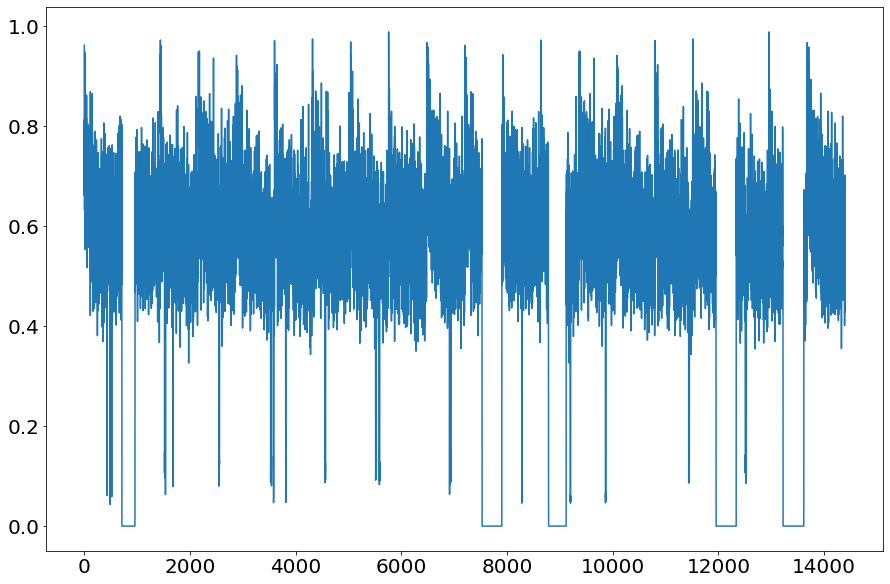

In [32]:
random.seed(42)

lent = df['QoE'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoE'][init1[i]:init1[i]+leng1[i]] = df['QoE'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoE'][init2[i]:init2[i]+leng2[i]] = df['QoE'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoE'][init3[i]:init3[i]+leng3[i]] = df['QoE'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoE'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[13607, 3000, 5670, 7201, 10334, 18, 560, 8915, 6343, 7175]
[5, 1, 9, 8, 6, 7, 1, 3, 3, 7]
-----------------------------
[12749, 8177, 6815, 2012, 14048, 551, 10138, 6196, 1492, 9434]
[10, 13, 11, 12, 12, 17, 13, 20, 14, 17]
-----------------------------
[6504, 8526, 10974, 8685, 11527]
[402, 387, 478, 267, 272]
-----------------------------


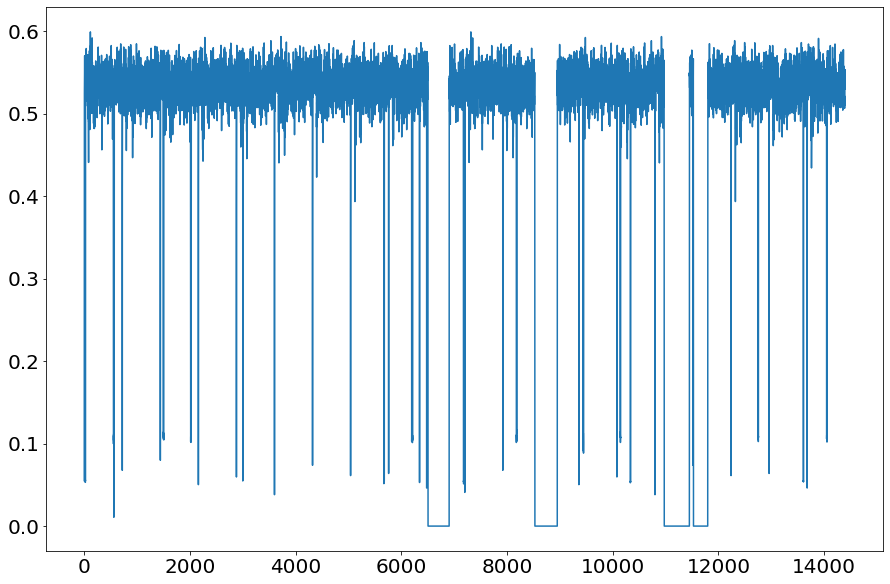

In [33]:
random.seed(52)

lent = df['QoD'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoD'][init1[i]:init1[i]+leng1[i]] = df['QoD'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoD'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoD'][init2[i]:init2[i]+leng2[i]] = df['QoD'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoD'][init3[i]:init3[i]+leng3[i]] = df['QoD'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoD'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[2646, 127, 4269, 10437, 2812, 14171, 2011, 495, 7742, 7718]
[10, 3, 2, 4, 8, 5, 6, 3, 9, 3]
-----------------------------
[7338, 9220, 317, 10108, 6518, 5020, 5613, 5936, 7586, 254]
[18, 10, 15, 19, 20, 12, 13, 11, 15, 18]
-----------------------------
[3198, 2833, 9809, 11988, 499]
[357, 348, 418, 321, 343]
-----------------------------


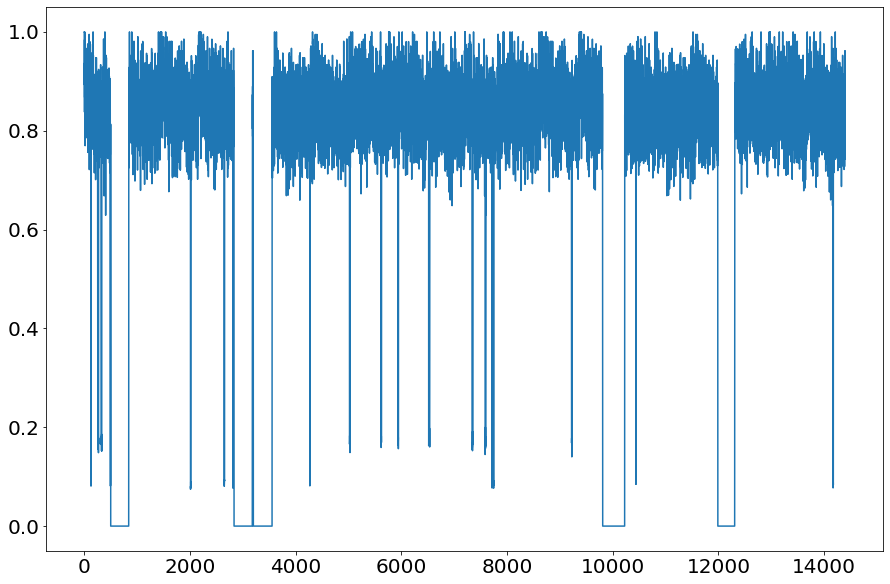

In [34]:
random.seed(62)

lent = df['QoI'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoI'][init1[i]:init1[i]+leng1[i]] = df['QoI'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoI'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoI'][init2[i]:init2[i]+leng2[i]] = df['QoI'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoI'][init3[i]:init3[i]+leng3[i]] = df['QoI'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoI'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[11516, 11391, 5616, 3809, 6225, 2349, 10381, 443, 11337, 13231]
[2, 10, 3, 6, 9, 10, 6, 5, 10, 3]
-----------------------------
[14301, 6831, 4161, 4413, 5683, 6067, 3614, 6123, 13953, 7994]
[13, 17, 10, 17, 11, 14, 11, 18, 15, 10]
-----------------------------
[6687, 13872, 9361, 5497, 2513]
[327, 379, 454, 294, 353]
-----------------------------


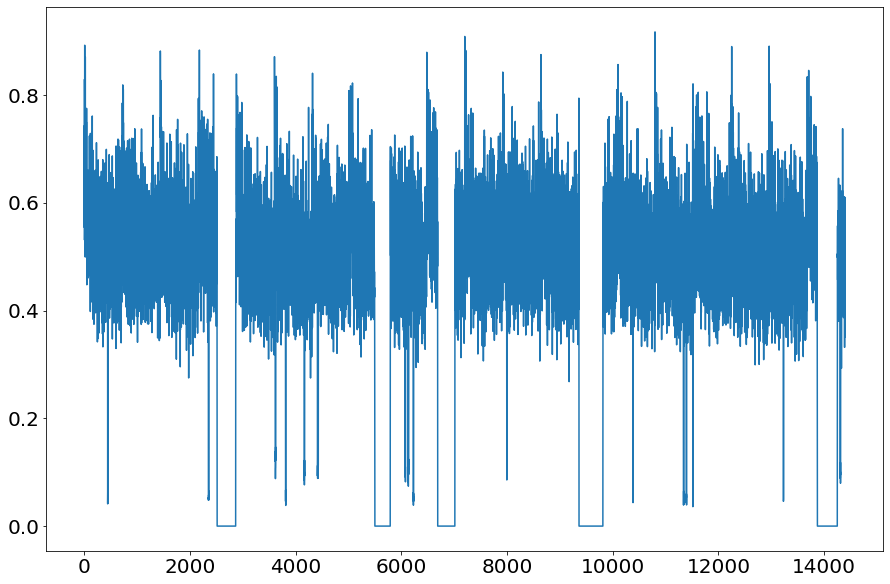

In [35]:
random.seed(72)

df['QC'] = pd.read_csv('../csv/S1_Rural_QC.csv')
lent = df['QC'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QC'][init1[i]:init1[i]+leng1[i]] = df['QC'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QC'][init2[i]:init2[i]+leng2[i]] = df['QC'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QC'][init3[i]:init3[i]+leng3[i]] = df['QC'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QC'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [36]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 


In [37]:
from sklearn.model_selection import train_test_split

# choose a number of time steps
n_steps = 5
# split into samples
X_QoE, y_QoE = split_sequence(df['QoE'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])
    


In [38]:
n_features = 1
X_QoE = X_QoE.reshape((X_QoE.shape[0], X_QoE.shape[1], n_features))
#print(X_QoE)
# define model
model_QoE = Sequential()
model_QoE.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoE.add(Dense(1))
model_QoE.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoE, X_test_QoE, y_train_QoE, y_test_QoE = train_test_split(X_QoE, y_QoE, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoE = model_QoE.fit(X_train_QoE, y_train_QoE, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoE = model_QoE.predict(X_test_QoE, verbose=0)
print([yhat_QoE,y_test_QoE])

Epoch 1/150
2/2 [==============================] - 0s 11ms/step - loss: 0.2438
Epoch 2/150
2/2 [==============================] - 0s 12ms/step - loss: 0.2170
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.1931
Epoch 4/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1720
Epoch 5/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1535
Epoch 6/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1372
Epoch 7/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1229
Epoch 8/150
2/2 [==============================] - 0s 12ms/step - loss: 0.1104
Epoch 9/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0996
Epoch 10/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0900
Epoch 11/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0816
Epoch 12/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0743
Epoch 13/150
2/2 [==============================] - 

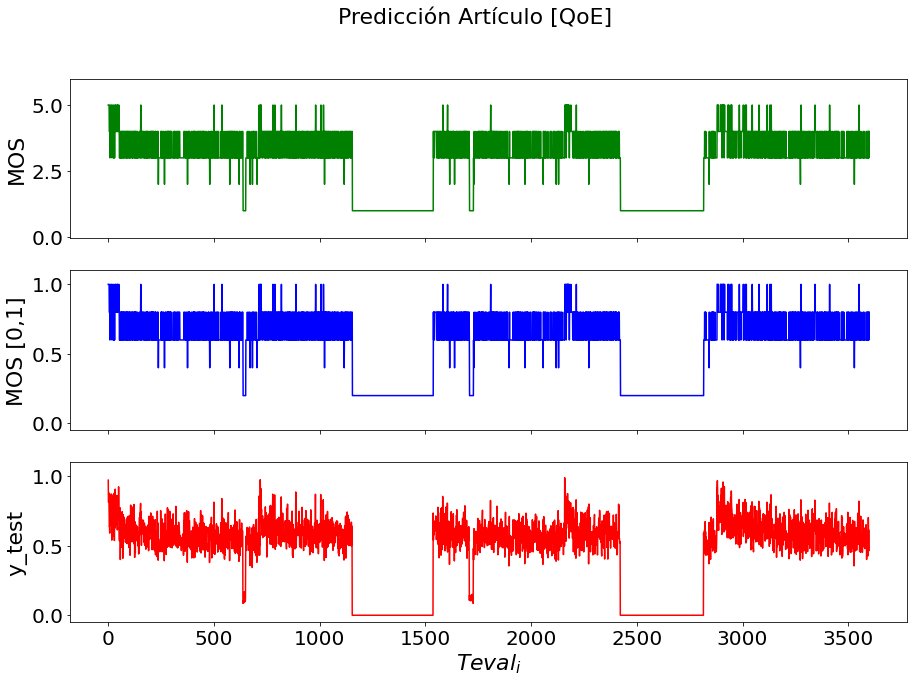

In [39]:
fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción Artículo [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(yhat,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('MOS', fontsize=22)
ax1.set_ylim([-0.05,6])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(yhat2,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('MOS [0,1]', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-paperEstimationQoE.png', format='png',bbox_inches='tight')

plt.show()

In [40]:
yhat2 = list(yhat2)
yhat2.pop()

0.8

In [41]:
print('R2 Score [QoE paper]: '+str(r2_score(y_test_QoE, yhat2)))

R2 Score [QoE paper: 0.5470746239869906


dict_keys(['loss'])


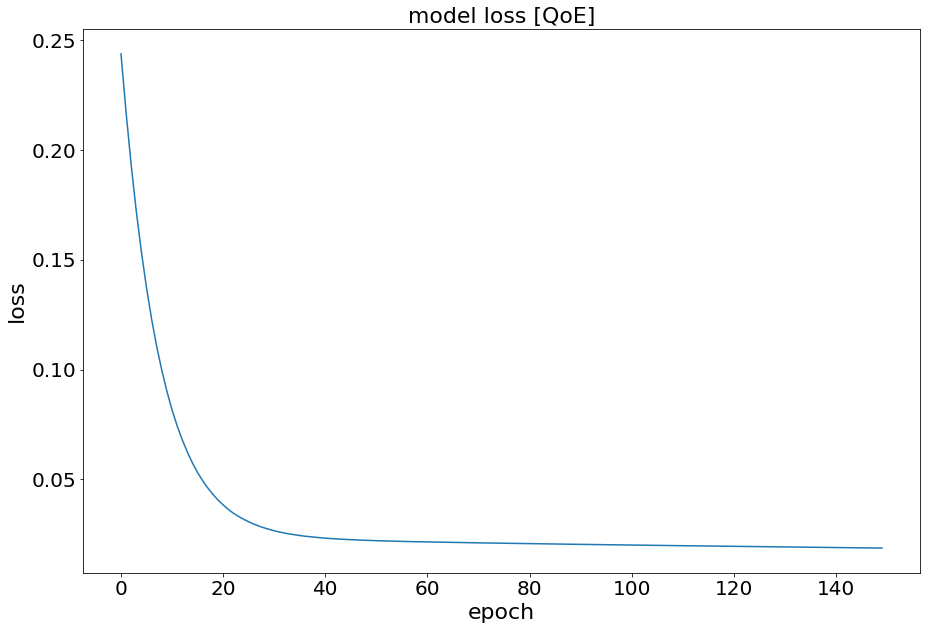

In [42]:
# list all data in history
print(history_QoE.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoE.history['loss'])
plt.title('model loss [QoE]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-model_QoE_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

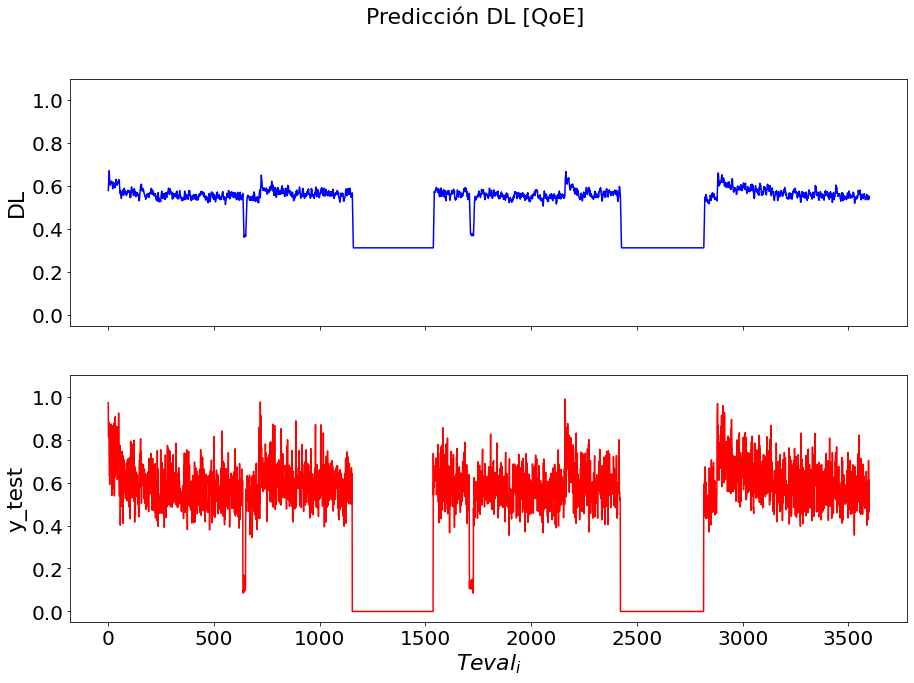

In [43]:
fig2, ((ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax2.plot(yhat_QoE,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-modelEstimationQoE.png', format='png',bbox_inches='tight')

plt.show()

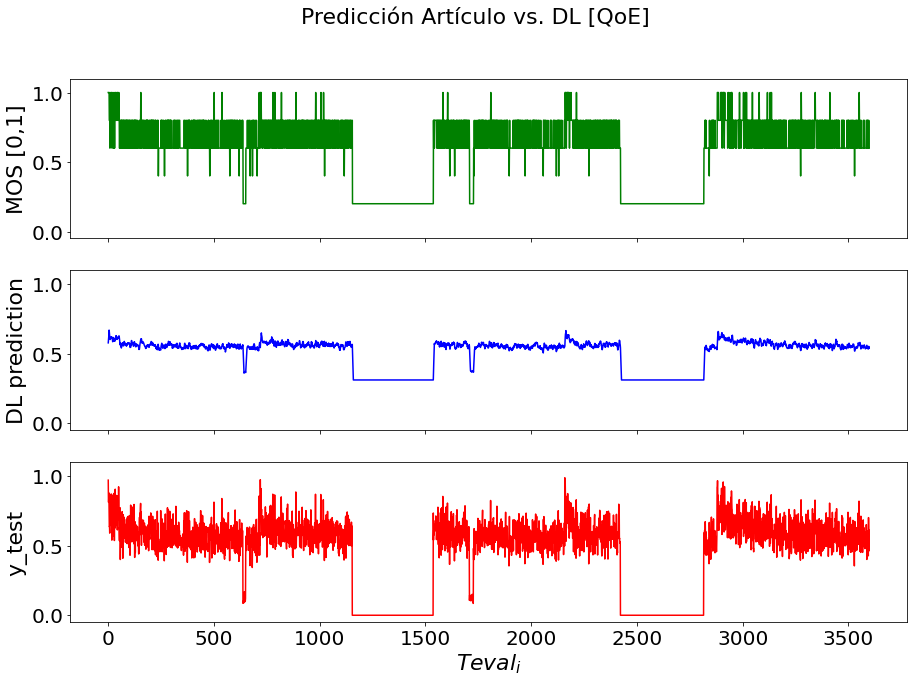

In [44]:
fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción Artículo vs. DL [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(yhat2,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('MOS [0,1]', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(yhat_QoE,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-comparisonPaperDLYtestQoE.png', format='png',bbox_inches='tight')

plt.show()

In [45]:
print('R2 Score [QoE]: '+str(r2_score(y_test_QoE, yhat_QoE)))

R2 Score [QoE]: 0.5659787577919048


          yhat    y_test      diff
0     0.579294  0.971698  0.392404
1     0.599210  0.815140  0.215929
2     0.611877  0.812028  0.200152
3     0.633898  0.880008  0.246109
4     0.670958  0.780384  0.109426
...        ...       ...       ...
3594  0.550825  0.427510  0.123315
3595  0.536080  0.702353  0.166273
3596  0.553875  0.587694  0.033819
3597  0.551456  0.462399  0.089057
3598  0.542694  0.610308  0.067614

[3599 rows x 3 columns]


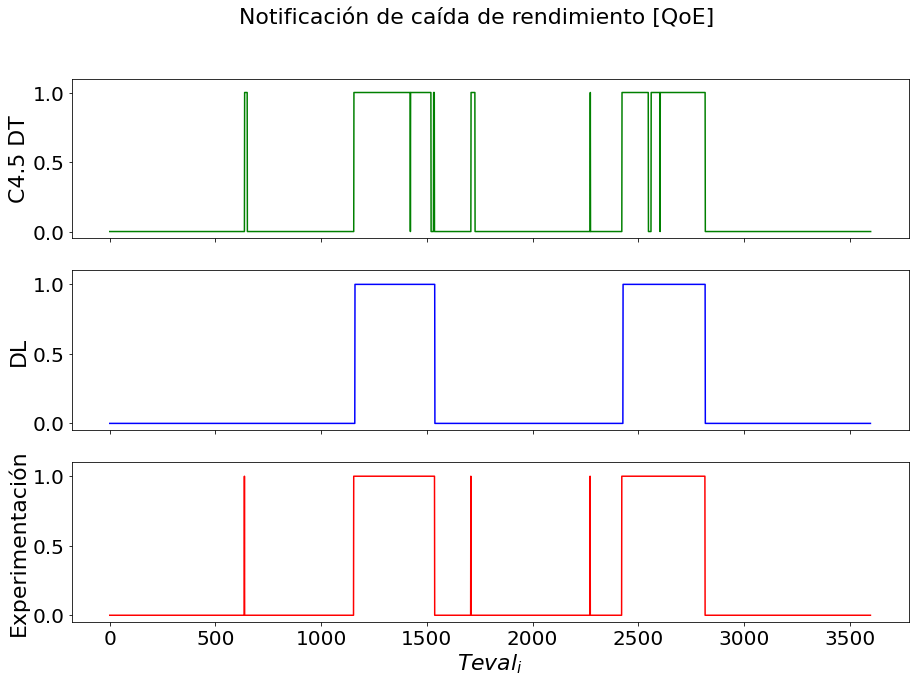

In [46]:
res_QoE = pd.DataFrame()
res_QoE['yhat'] = yhat_QoE.ravel()
res_QoE['y_test'] = y_test_QoE
res_QoE['diff'] = abs(res_QoE['yhat']-res_QoE['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoE)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoE['yhat'].shape[0]):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoE['yhat'][i] < res_QoE['y_test'][i-1]*th or res_QoE['yhat'][i] == res_QoE['yhat'][i-1] or res_QoE['yhat'][i] <= 0.3):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoE['y_test'][i] < res_QoE['y_test'][i-1]*th or res_QoE['y_test'][i] == res_QoE['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(notif_paper,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('C4.5 DT', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(x,notif2,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('Experimentación', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-NotificationsQoE.png', format='png',bbox_inches='tight')

plt.show()


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2817
FP: 2
FN: 15
TP: 765
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2819
           1       1.00      0.98      0.99       780

    accuracy                           1.00      3599
   macro avg       1.00      0.99      0.99      3599
weighted avg       1.00      1.00      1.00      3599



In [48]:


notif_paper2 = notif_paper.pop()



tn, fp, fn, tp = confusion_matrix(notif2, notif_paper).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif_paper))

TN: 2785
FP: 34
FN: 33
TP: 747
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2819
           1       0.96      0.96      0.96       780

    accuracy                           0.98      3599
   macro avg       0.97      0.97      0.97      3599
weighted avg       0.98      0.98      0.98      3599



In [49]:
print('************Diferencias Testing [QoE] **************')
print(max(res_QoE['diff']))
#print(min(res_QoE['diff']))
print(sum(res_QoE['diff'])/len(res_QoE))
print()

************Diferencias Testing [QoE] **************
0.5680559277534485
0.12682366393401381



In [50]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoI, y_QoI = split_sequence(df['QoI'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])

In [51]:
n_features = 1
X_QoI = X_QoI.reshape((X_QoI.shape[0], X_QoI.shape[1], n_features))
#print(X_QoI)
# define model
model_QoI = Sequential()
model_QoI.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoI.add(Dense(1))
model_QoI.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoI, X_test_QoI, y_train_QoI, y_test_QoI = train_test_split(X_QoI, y_QoI, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoI = model_QoI.fit(X_train_QoI, y_train_QoI, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoI = model_QoI.predict(X_test_QoI, verbose=0)
print([yhat_QoI,y_test_QoI])

Epoch 1/150
2/2 [==============================] - 0s 11ms/step - loss: 0.6688
Epoch 2/150
2/2 [==============================] - 0s 11ms/step - loss: 0.5700
Epoch 3/150
2/2 [==============================] - 0s 11ms/step - loss: 0.4878
Epoch 4/150
2/2 [==============================] - 0s 9ms/step - loss: 0.4187
Epoch 5/150
2/2 [==============================] - 0s 13ms/step - loss: 0.3613
Epoch 6/150
2/2 [==============================] - 0s 11ms/step - loss: 0.3132
Epoch 7/150
2/2 [==============================] - 0s 11ms/step - loss: 0.2723
Epoch 8/150
2/2 [==============================] - 0s 9ms/step - loss: 0.2373
Epoch 9/150
2/2 [==============================] - 0s 11ms/step - loss: 0.2076
Epoch 10/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1825
Epoch 11/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1608
Epoch 12/150
2/2 [==============================] - 0s 10ms/step - loss: 0.1429
Epoch 13/150
2/2 [==============================] - 0

dict_keys(['loss'])


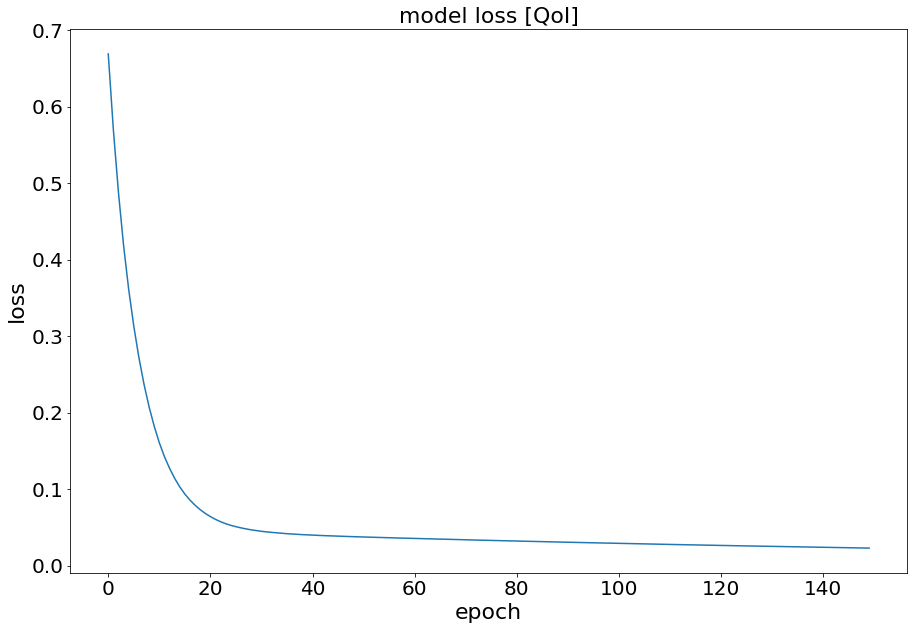

In [52]:
# list all data in history
print(history_QoI.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoI.history['loss'])
plt.title('model loss [QoI]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-model_QoI_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

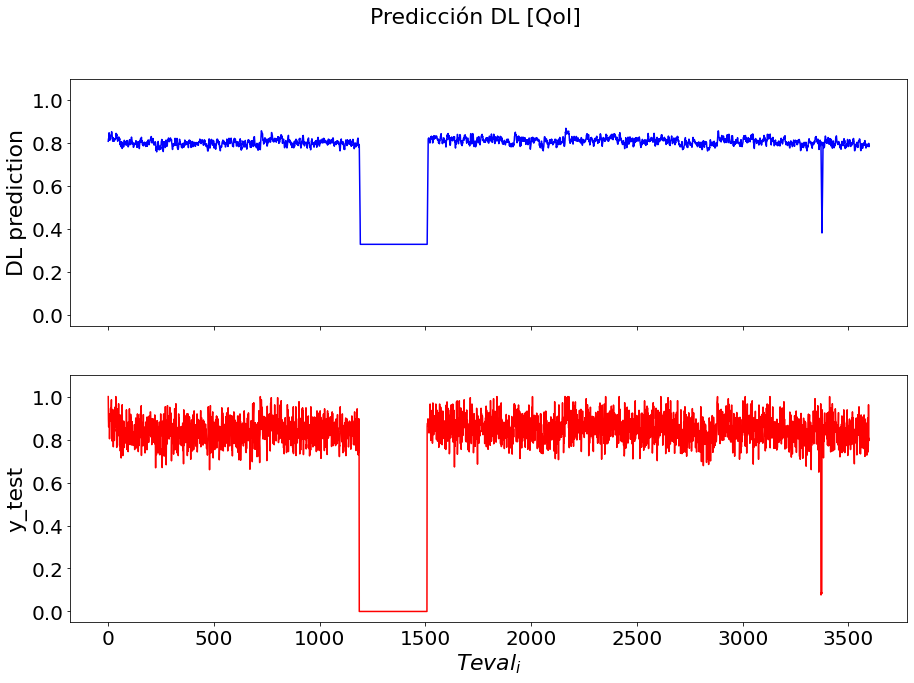

In [53]:
fig2, ( (ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoI]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax2.plot(yhat_QoI,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoI,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-comparisonPaperDLYtestQoI.png', format='png',bbox_inches='tight')

plt.show()

In [54]:
print('R2 Score [QoI]: '+str(r2_score(y_test_QoI, yhat_QoI)))

R2 Score [QoI]: 0.7512269520581635


          yhat    y_test      diff
0     0.808190  1.000000  0.191810
1     0.819368  0.894568  0.075200
2     0.821565  0.859120  0.037555
3     0.823811  0.890547  0.066736
4     0.847868  0.861739  0.013871
...        ...       ...       ...
3594  0.786821  0.771903  0.014918
3595  0.786148  0.962085  0.175938
3596  0.798688  0.799803  0.001115
3597  0.783096  0.805687  0.022592
3598  0.787188  0.796209  0.009020

[3599 rows x 3 columns]


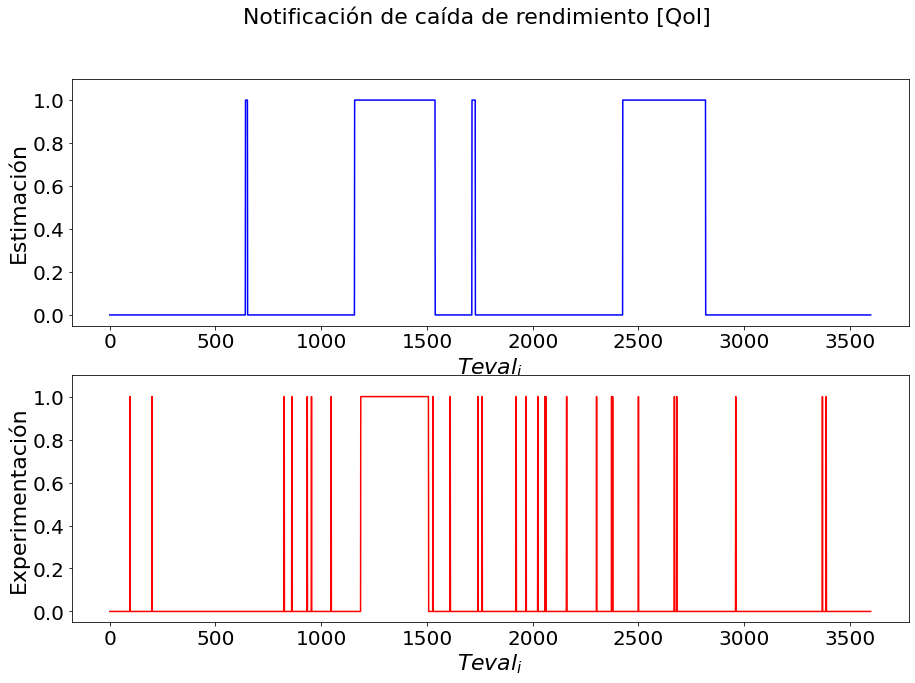

In [55]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoI['yhat'].shape[0]):
    #print([res_QoI['yhat'][i], res_QoI['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoI['yhat'][i] < res_QoI['y_test'][i-1]*th or res_QoI['yhat'][i] == res_QoI['yhat'][i-1] or res_QoE['yhat'][i] <= 0.4):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoI['y_test'][i] < res_QoI['y_test'][i-1]*th or res_QoI['y_test'][i] == res_QoI['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoI]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-NotificationsQoI.png', format='png',bbox_inches='tight')

plt.show()


In [56]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2777
FP: 474
FN: 23
TP: 325
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3251
           1       0.41      0.93      0.57       348

    accuracy                           0.86      3599
   macro avg       0.70      0.89      0.74      3599
weighted avg       0.94      0.86      0.88      3599



In [57]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

          yhat    y_test      diff
0     0.808190  1.000000  0.191810
1     0.819368  0.894568  0.075200
2     0.821565  0.859120  0.037555
3     0.823811  0.890547  0.066736
4     0.847868  0.861739  0.013871
...        ...       ...       ...
3594  0.786821  0.771903  0.014918
3595  0.786148  0.962085  0.175938
3596  0.798688  0.799803  0.001115
3597  0.783096  0.805687  0.022592
3598  0.787188  0.796209  0.009020

[3599 rows x 3 columns]


In [58]:
print('************Diferencias Testing [QoI] **************')
print(max(res_QoI['diff']))
#print(min(res_QoI['diff']))
print(sum(res_QoI['diff'])/len(res_QoI))
print()

************Diferencias Testing [QoI] **************
0.7895187139511108
0.08349953410617848



In [59]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoD, y_QoD = split_sequence(df['QoD'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QoD[i], y_QoD[i])

In [60]:
n_features = 1
X_QoD = X_QoD.reshape((X_QoD.shape[0], X_QoD.shape[1], n_features))
#print(X_QoD)
# define model
model_QoD = Sequential()
model_QoD.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoD.add(Dense(1))
model_QoD.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoD, X_test_QoD, y_train_QoD, y_test_QoD = train_test_split(X_QoD, y_QoD, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoD = model_QoD.fit(X_train_QoD, y_train_QoD, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
#print([yhat_QoD,y_test_QoD])


Epoch 1/150
2/2 [==============================] - 0s 11ms/step - loss: 0.2481
Epoch 2/150
2/2 [==============================] - 0s 9ms/step - loss: 0.2144
Epoch 3/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1853
Epoch 4/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1599
Epoch 5/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1382
Epoch 6/150
2/2 [==============================] - 0s 12ms/step - loss: 0.1196
Epoch 7/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1040
Epoch 8/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0908
Epoch 9/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0795
Epoch 10/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0699
Epoch 11/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0616
Epoch 12/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0546
Epoch 13/150
2/2 [==============================] - 0s 

In [61]:
yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
print([yhat_QoD,y_test_QoD])

[array([[0.47241306],
       [0.46422368],
       [0.4644025 ],
       ...,
       [0.5119793 ],
       [0.51254636],
       [0.51100844]], dtype=float32), array([0.38462011, 0.5473251 , 0.53928171, ..., 0.55237941, 0.52961147,
       0.55300191])]


dict_keys(['loss'])


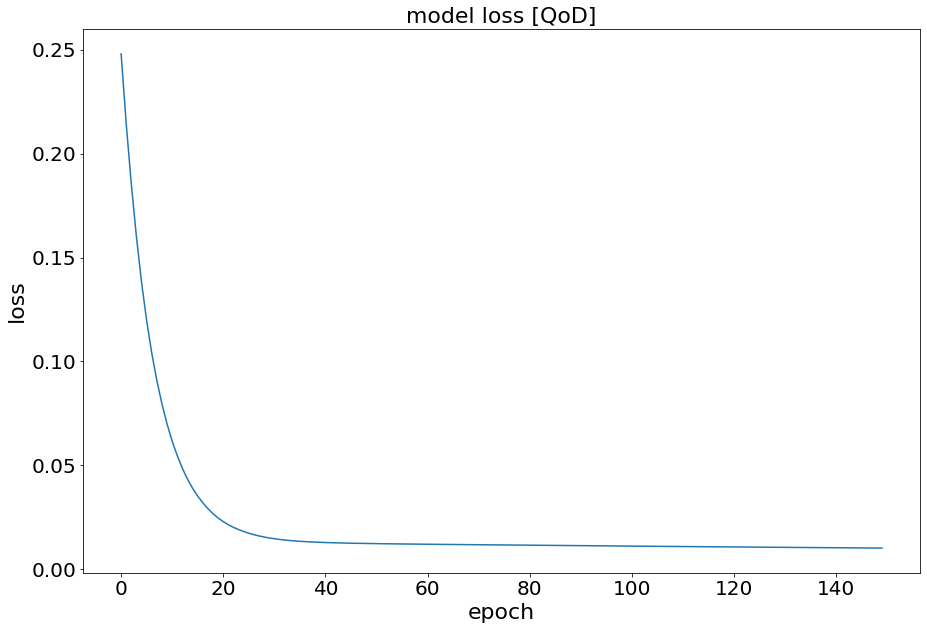

In [62]:
# list all data in history
print(history_QoD.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoD.history['loss'])
plt.title('model loss [QoD]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-model_QoD_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

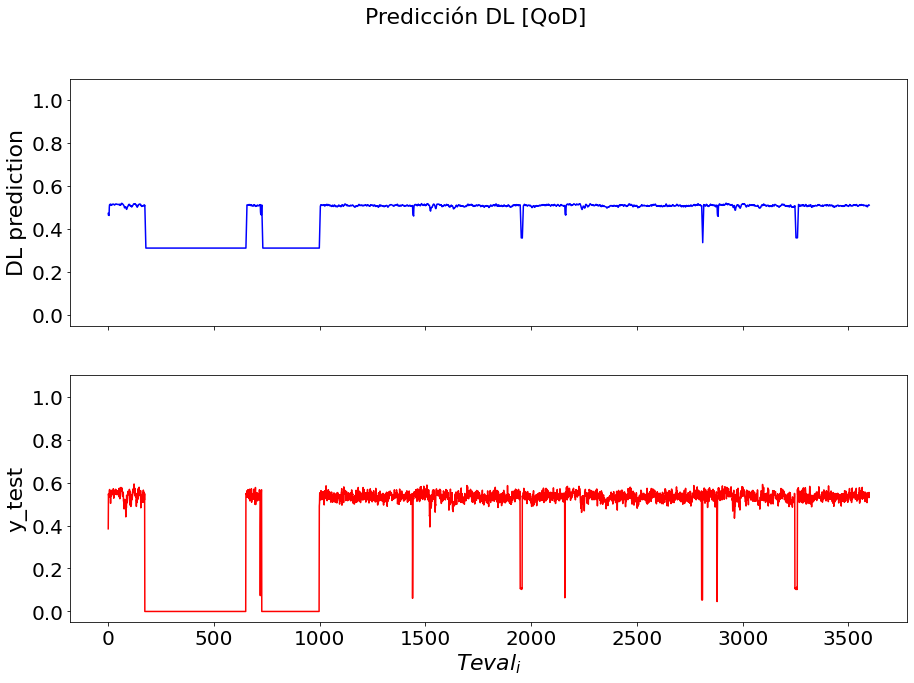

In [63]:
fig2, ((ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoD]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)


ax2.plot(yhat_QoD,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoD,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-comparisonPaperDLYtestQoD.png', format='png',bbox_inches='tight')

plt.show()

In [64]:
print('R2 Score: '+str(r2_score(y_test_QoD, yhat_QoD)))

R2 Score: 0.5365750461988346


          yhat    y_test      diff
0     0.472413  0.384620  0.087793
1     0.464224  0.547325  0.083101
2     0.464402  0.539282  0.074879
3     0.464338  0.531847  0.067509
4     0.462918  0.540210  0.077292
...        ...       ...       ...
3594  0.511060  0.546984  0.035924
3595  0.512177  0.540139  0.027962
3596  0.511979  0.552379  0.040400
3597  0.512546  0.529611  0.017065
3598  0.511008  0.553002  0.041993

[3599 rows x 3 columns]


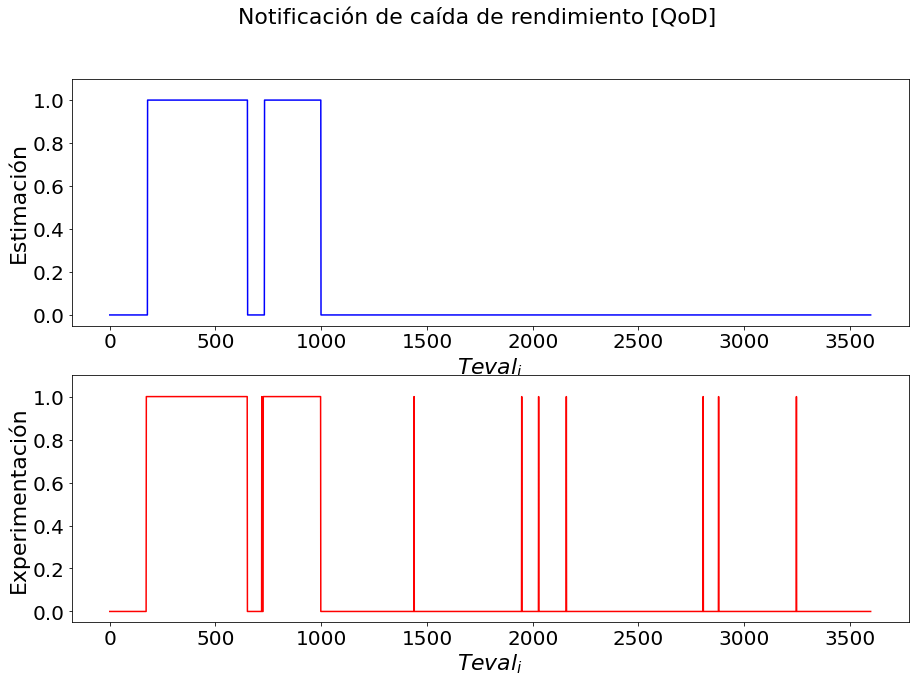

In [65]:
res_QoD = pd.DataFrame()
res_QoD['yhat'] = yhat_QoD.ravel()
res_QoD['y_test'] = y_test_QoD
res_QoD['diff'] = abs(res_QoD['yhat']-res_QoD['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoD)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoD['yhat'].shape[0]):
    #print([res_QoD['yhat'][i], res_QoD['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoD['yhat'][i] < res_QoD['y_test'][i-1]*th or res_QoD['yhat'][i] == res_QoD['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoD['y_test'][i] < res_QoD['y_test'][i-1]*th or res_QoD['y_test'][i] == res_QoD['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoD]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-NotificationsQoD.png', format='png',bbox_inches='tight')

plt.show()

In [66]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2839
FP: 2
FN: 20
TP: 738
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2841
           1       1.00      0.97      0.99       758

    accuracy                           0.99      3599
   macro avg       1.00      0.99      0.99      3599
weighted avg       0.99      0.99      0.99      3599



In [67]:
print('************Diferencias Testing [QoD] **************')
print(max(res_QoD['diff']))
#print(min(res_QoD['diff']))
print(sum(res_QoD['diff'])/len(res_QoD))
print()

************Diferencias Testing [QoD] **************
0.512022078037262
0.09087854505736975



In [68]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QC, y_QC = split_sequence(df['QC'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QC[i], y_QC[i])

In [69]:
n_features = 1
X_QC = X_QC.reshape((X_QC.shape[0], X_QC.shape[1], n_features))
#print(X_QC)
# define model
model_QC = Sequential()
model_QC.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QC.add(Dense(1))
model_QC.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QC, X_test_QC, y_train_QC, y_test_QC = train_test_split(X_QC, y_QC, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QC = model_QC.fit(X_train_QC, y_train_QC, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QC = model_QC.predict(X_test_QC, verbose=0)
#print([yhat_QC,y_test_QC])


Epoch 1/150
2/2 [==============================] - 0s 9ms/step - loss: 0.2579
Epoch 2/150
2/2 [==============================] - 0s 10ms/step - loss: 0.2279
Epoch 3/150
2/2 [==============================] - 0s 10ms/step - loss: 0.2017
Epoch 4/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1791
Epoch 5/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1600
Epoch 6/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1433
Epoch 7/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1287
Epoch 8/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1158
Epoch 9/150
2/2 [==============================] - 0s 10ms/step - loss: 0.1047
Epoch 10/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0949
Epoch 11/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0865
Epoch 12/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0791
Epoch 13/150
2/2 [==============================] - 0

In [70]:
yhat_QC = model_QC.predict(X_test_QC, verbose=0)
print([yhat_QC,y_test_QC])

[array([[0.48297   ],
       [0.5017388 ],
       [0.51052237],
       ...,
       [0.47307783],
       [0.47253042],
       [0.46542478]], dtype=float32), array([0.91722573, 0.731689  , 0.74107697, ..., 0.5537432 , 0.43865273,
       0.53208315])]


dict_keys(['loss'])


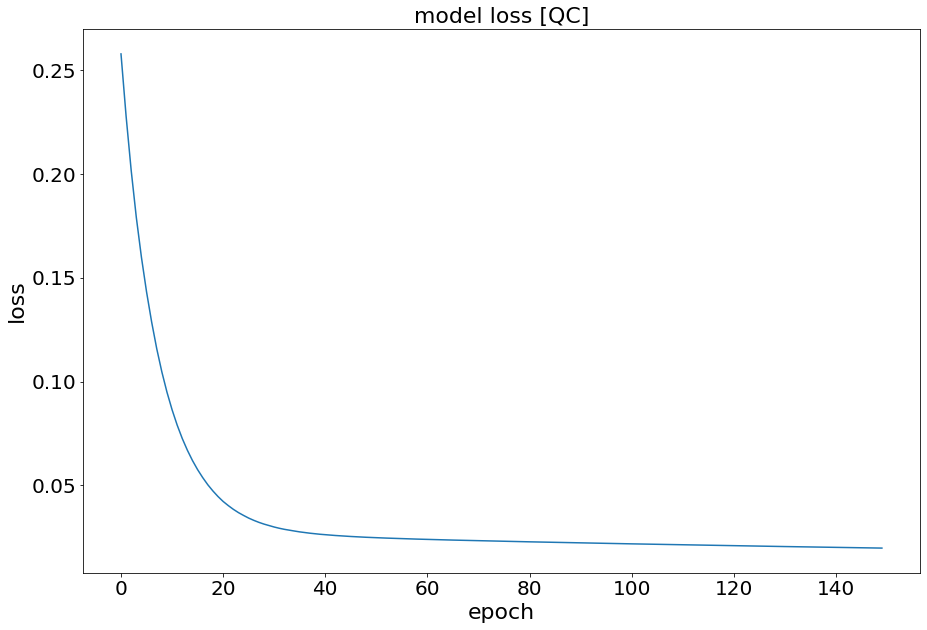

In [71]:
# list all data in history
print(history_QC.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QC.history['loss'])
plt.title('model loss [QC]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-model_QC_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

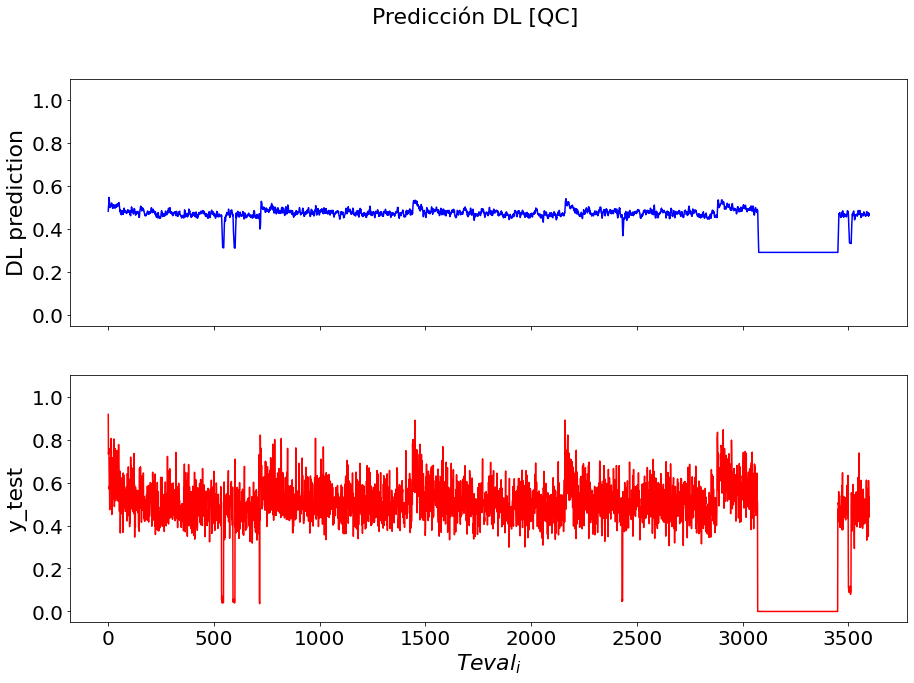

In [72]:
fig2, ( (ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QC]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)


ax2.plot(yhat_QC,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QC,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-comparisonPaperDLYtestQC.png', format='png',bbox_inches='tight')

plt.show()

In [73]:
print('R2 Score: '+str(r2_score(y_test_QC, yhat_QC)))

R2 Score: 0.47238037575048997


          yhat    y_test      diff
0     0.482970  0.917226  0.434256
1     0.501739  0.731689  0.229950
2     0.510522  0.741077  0.230555
3     0.526093  0.758396  0.232303
4     0.547074  0.662072  0.114998
...        ...       ...       ...
3594  0.474803  0.350358  0.124444
3595  0.459642  0.609377  0.149735
3596  0.473078  0.553743  0.080665
3597  0.472530  0.438653  0.033878
3598  0.465425  0.532083  0.066658

[3599 rows x 3 columns]


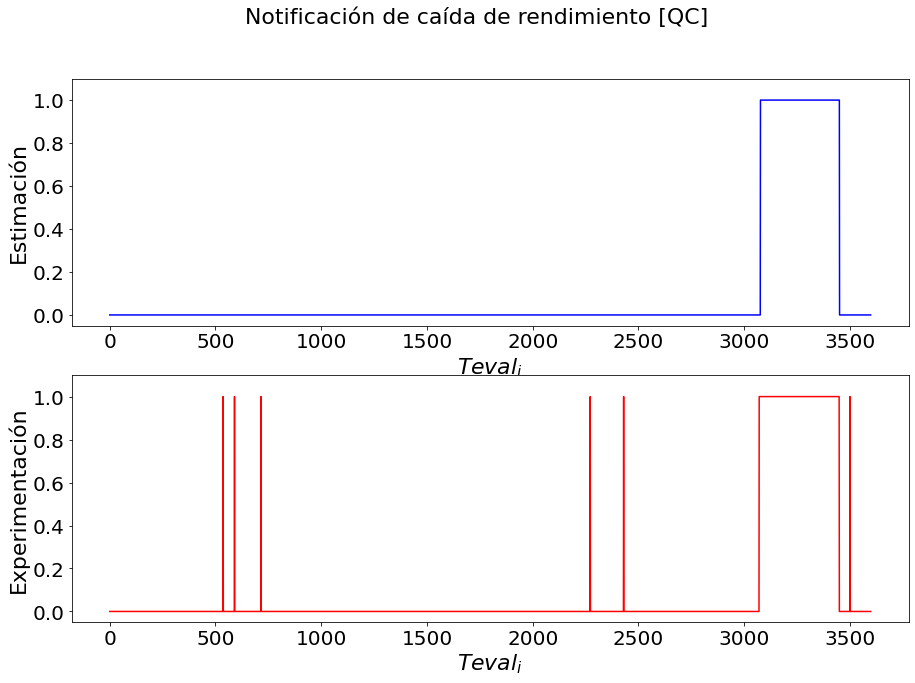

In [74]:
res_QC = pd.DataFrame()
res_QC['yhat'] = yhat_QC.ravel()
res_QC['y_test'] = y_test_QC
res_QC['diff'] = abs(res_QC['yhat']-res_QC['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QC)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QC['yhat'].shape[0]):
    #print([res_QC['yhat'][i], res_QC['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QC['yhat'][i] < res_QC['y_test'][i-1]*th or res_QC['yhat'][i] == res_QC['yhat'][i-1] ):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QC['y_test'][i] < res_QC['y_test'][i-1]*th or res_QC['y_test'][i] == res_QC['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QC]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Rural-NotificationsQC.png', format='png',bbox_inches='tight')

plt.show()

In [75]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3213
FP: 1
FN: 12
TP: 373
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3214
           1       1.00      0.97      0.98       385

    accuracy                           1.00      3599
   macro avg       1.00      0.98      0.99      3599
weighted avg       1.00      1.00      1.00      3599

